In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext lab_black

In [2]:
from glob import glob
import os
import pandas as pd
from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS, STATE_ORDER
from src.figure_utilities import TWO_COLUMN, PAGE_HEIGHT, save_figure
import seaborn as sns
import matplotlib.pyplot as plt
from src.visualization import (
    plot_category_counts,
    plot_category_duration,
    plot_linear_position_markers,
)

from loren_frank_data_processing import make_tetrode_dataframe
from src.parameters import ANIMALS, STATE_ORDER, _BRAIN_AREAS

tetrode_info = make_tetrode_dataframe(ANIMALS)

data_type, dim = "clusterless", "1D"
n_unique_spiking = 2

file_paths = glob(
    os.path.join(PROCESSED_DATA_DIR, f"*_{data_type}_{dim}_replay_info_80.csv")
)
replay_info = pd.concat(
    [pd.read_csv(file_path) for file_path in file_paths], axis=0,
).set_index(["animal", "day", "epoch", "ripple_number"])
replay_info = replay_info.loc[
    replay_info.n_unique_spiking >= n_unique_spiking
].sort_index()

is_brain_areas = tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS)
n_tetrodes = (
    tetrode_info.loc[is_brain_areas]
    .groupby(["animal", "day", "epoch"])
    .tetrode_id.count()
    .rename("n_tetrodes")
)
replay_info = pd.merge(
    replay_info.reset_index(), pd.DataFrame(n_tetrodes).reset_index()
).set_index(["animal", "day", "epoch", "ripple_number"])

for state in STATE_ORDER:
    replay_info[f"{state}_pct_unique_spiking"] = (
        replay_info[f"{state}_n_unique_spiking"] / replay_info["n_tetrodes"]
    )
replay_info = replay_info.rename(index={"Cor": "cor"}).rename_axis(
    index={"animal": "Animal ID"}
)
replay_info.head()

Continuous  Continuous_Cont_avg_prob  \
Animal ID day epoch ripple_number                                         
cor       1   2     1                   False                       NaN   
                    2                   False                       NaN   
                    3                   False                       NaN   
                    4                    True                  0.950692   
                    5                   False                       NaN   

                                   Continuous_Frag_avg_prob  \
Animal ID day epoch ripple_number                             
cor       1   2     1                                   NaN   
                    2                                   NaN   
                    3                                   NaN   
                    4                              0.009041   
                    5                                   NaN   

                                   Continuous_Hov_avg_prob  \
Animal ID day epoch ripple_number                            
cor       1   2     1                                  NaN   
                    2                                  NaN   
                    3                                  NaN   
                    4                             0.040267   
                    5                                  NaN   

                                   Continuous_duration  \
Animal ID day epoch ripple_number                        
cor       1   2     1                            0.000   
                    2                            0.000   
                    3                            0.000   
                    4                            0.078   
                    5                            0.000   

                                   Continuous_max_probability  \
Animal ID day epoch ripple_number                               
cor       1   2     1                                0.433000   
                    2                                0.145381   
                    3                                0.253176   
                    4                                0.984090   
                    5                                0.471484   

                                   Continuous_max_time  Continuous_min_time  \
Animal ID day epoch ripple_number                                             
cor       1   2     1                              NaN                  NaN   
                    2                              NaN                  NaN   
                    3                              NaN                  NaN   
                    4                            0.076                  0.0   
                    5                              NaN                  NaN   

                                   Continuous_n_total_spikes  \
Animal ID day epoch ripple_number                              
cor       1   2     1                                    NaN   
                    2                                    NaN   
                    3                                    NaN   
                    4                                  112.0   
                    5                                    NaN   

                                   Continuous_n_unique_spiking  ...  \
Animal ID day epoch ripple_number                               ...   
cor       1   2     1                                      NaN  ...   
                    2                                      NaN  ...   
                    3                                      NaN  ...   
                    4                                      9.0  ...   
                    5                                      NaN  ...   

                                   spatial_coverage  \
Animal ID day epoch ripple_number                     
cor       1   2     1                     56.079072   
                    2                     25.298829   
                    3                     16.320

In [3]:
category = "replay_speed"
is_col = replay_info.columns.str.endswith(f"_{category}")
replay_info.loc[:, is_col]

Continuous_replay_speed  \
Animal ID day epoch ripple_number                            
cor       1   2     1                                  NaN   
                    2                                  NaN   
                    3                                  NaN   
                    4                           614.735206   
                    5                                  NaN   
...                                                    ...   
remy      37  4     297                         253.018903   
                    298                                NaN   
                    299                                NaN   
                    300                                NaN   
                    301                                NaN   

                                   Fragmented-Continuous-Mix_replay_speed  \
Animal ID day epoch ripple_number                                           
cor       1   2     1                                                 NaN   
                    2                                                 NaN   
                    3                                                 NaN   
                    4                                         6925.913104   
                    5                                                 NaN   
...                                                                   ...   
remy      37  4     297                                               NaN   
                    298                                               NaN   
                    299                                       5960.762055   
                    300                                       2233.127147   
                    301                                               NaN   

                                   Fragmented_replay_speed  \
Animal ID day epoch ripple_number                            
cor       1   2     1                                  NaN   
                    2                                  NaN   
                    3                                  NaN   
                    4                                  NaN   
                    5                                  NaN   
...                                                    ...   
remy      37  4     297                                NaN   
                    298                                NaN   
                    299                        8510.743804   
                    300                       11909.319940   
                    301                                NaN   

                                   Hover-Continuous-Mix_replay_speed  \
Animal ID day epoch ripple_number                                      
cor       1   2     1                                   9.838003e+02   
                    2                                            NaN   
                    3                                   3.726685e-13   
                    4                                            NaN   
                    5                                   2.564157e-14   
...                                                              ...   
remy      37  4     297                                 3.707951e+02   
                    298                                          NaN   
                    299                                          NaN   
                    300                                          NaN   
                    301                                 2.480440e-13   

                                   Hover_replay_speed  
Animal ID day epoch ripple_number                      
cor       1   2     1                             NaN  
                    2                    1.945794e-12  
                    3                    1.949160e-13  
                    4                             NaN  
                    5                             NaN  
...                                               ...  
remy      37  4     297           

In [4]:
replay_info.loc[replay_info.Hover_replay_speed > 20].Hover_replay_speed

Animal ID  day  epoch  ripple_number
cor        7    2      29               11276.096671
bon        3    2      146               5143.870946
                6      27                 126.404512
           4    2      20                2548.262776
           6    6      186                687.533771
           10   2      190                 81.683962
cha        8    2      171                 36.562356
                4      61                 107.196430
con        1    2      79                  61.617912
                4      153                 51.490201
           2    2      32                3950.142194
           3    2      21                  54.822021
                4      148                 69.031056
           5    2      19                  76.402487
           6    6      70                 121.018116
dav        7    3      49                  21.558777
                5      68                  65.167824
                7      42                 136.796502
dud      

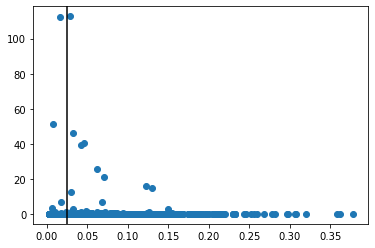

In [13]:
plt.scatter(replay_info.Hover_duration, replay_info.Hover_replay_speed / 100)
plt.axvline(0.025, color="black")

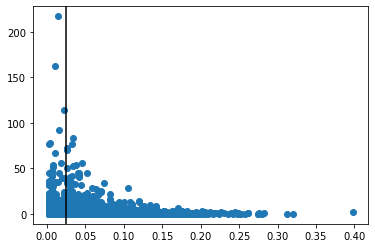

In [15]:
plt.scatter(
    replay_info["Hover-Continuous-Mix_duration"],
    replay_info["Hover-Continuous-Mix_replay_speed"] / 100,
)
plt.axvline(0.025, color="black")

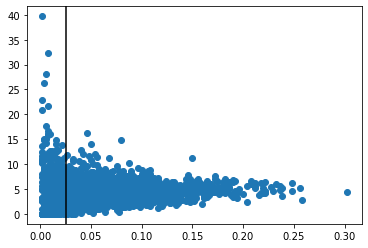

In [16]:
plt.scatter(replay_info.Continuous_duration, replay_info.Continuous_replay_speed / 100)
plt.axvline(0.025, color="black")

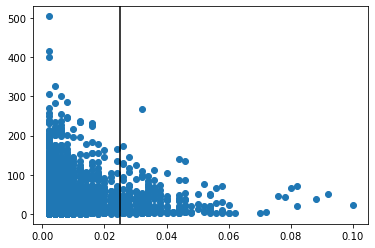

In [17]:
plt.scatter(
    replay_info["Fragmented-Continuous-Mix_duration"],
    replay_info["Fragmented-Continuous-Mix_replay_speed"] / 100,
)
plt.axvline(0.025, color="black")

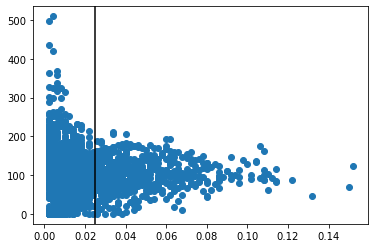

In [18]:
plt.scatter(
    replay_info["Fragmented_duration"], replay_info["Fragmented_replay_speed"] / 100,
)
plt.axvline(0.025, color="black")

In [19]:
(
    replay_info.loc[replay_info.Hover_replay_speed > 20].Hover_replay_speed.max(),
    replay_info.loc[replay_info.Hover_replay_speed > 20].Hover_replay_speed.argmax(),
)

(11276.096671297111, ('cor', 7, 2, 29))

In [20]:
from src.load_data import load_data

epoch_key = "Cor", 1, 4

data = load_data(epoch_key)

Failed to load file: /data2/edeno/replay_trajectory_paper/src/../Raw-Data/Corriander/CorDIO01.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /data2/edeno/replay_trajectory_paper/src/../Raw-Data/Corriander/CorDIO01.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /data2/edeno/replay_trajectory_paper/src/../Raw-Data/Corriander/CorDIO01.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /data2/edeno/replay_trajectory_paper/src/../Raw-Data/Corriander/CorDIO01.mat
No DIO file found, inferring correct inbound/outbound from task rules


In [21]:
import xarray as xr

animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 97, ripple_number: 303, state: 3, time: 130)
Coordinates:
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.258000
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * position           (position) float64 1.491 4.474 7.457 ... 303.2 306.0
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 299 300 301 302 303
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

In [39]:
from src.analysis import get_probability, get_is_classified
from src.analysis import (
    maximum_a_posteriori_estimate,
    calculate_replay_distance,
    gaussian_smooth,
)
from src.parameters import ANIMALS, SAMPLING_FREQUENCY
from loren_frank_data_processing.position import make_track_graph
from loren_frank_data_processing import reshape_to_segments
import pprint
import copy
import numpy as np


def plot_ripple(ripple_number, results, data):
    posterior = (
        results.sel(ripple_number=ripple_number)
        .acausal_posterior.dropna("time", how="all")
        .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
    )

    probability_threshold = 0.8

    probability = get_probability(results.sel(ripple_number=ripple_number))
    is_classified = get_is_classified(probability, probability_threshold)
    is_classified = is_classified.dropna("time", how="all").assign_coords(
        time=lambda ds: ds.time / np.timedelta64(1, "s")
    )
    probability = probability.dropna("time", how="all").assign_coords(
        time=lambda ds: ds.time / np.timedelta64(1, "s")
    )

    ripple_position_info = reshape_to_segments(
        data["position_info"], data["ripple_times"].loc[:, ["start_time", "end_time"]]
    )

    map_estimate = maximum_a_posteriori_estimate(posterior.sum("state"))
    actual_positions = ripple_position_info.loc[
        ripple_number, ["x_position", "y_position"]
    ].values
    actual_track_segment_ids = (
        ripple_position_info.loc[ripple_number, "track_segment_id"]
        .values.squeeze()
        .astype(int)
    )
    track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

    (
        replay_distance_from_actual_position,
        replay_distance_from_center_well,
    ) = calculate_replay_distance(
        track_graph,
        map_estimate,
        actual_positions,
        actual_track_segment_ids,
        data["position_info"],
    )

    time = np.asarray(posterior.time)
    replay_speed = np.abs(np.gradient(replay_distance_from_center_well, time))

    SMOOTH_SIGMA = 0.0025
    smoothed_replay_speed = gaussian_smooth(
        replay_speed, SMOOTH_SIGMA, SAMPLING_FREQUENCY
    )

    metrics = {}
    for state, above_threshold in is_classified.groupby("state"):
        above_threshold = above_threshold.astype(bool).values.squeeze()
        if np.any(above_threshold):
            metrics[f"{state}_replay_speed"] = np.median(
                smoothed_replay_speed[above_threshold]
            )  # cm / s

    gs_kw = dict(height_ratios=[0.25, 2, 1])
    fig_width = (posterior.time * 100).max() / 2
    fig, axes = plt.subplots(
        3,
        1,
        sharex=True,
        constrained_layout=True,
        figsize=(fig_width, 7),
        gridspec_kw=gs_kw,
    )
    for state, prob in zip(posterior.state.values, probability.values.T):
        axes[0].plot(
            time, prob, linewidth=2, color=STATE_COLORS[state], clip_on=False,
        )
    axes[0].set_ylim((0, 1))
    for state, is_class in zip(is_classified.state.values, is_classified.values.T):
        if is_class.sum() > 0:
            axes[0].fill_between(
                time,
                is_class,
                where=is_class.astype(bool),
                alpha=0.25,
                color=STATE_COLORS[state],
            )
    axes[0].axhline(0.8, color="lightgrey", linestyle="--", zorder=1)
    axes[0].set_title(f"ripple_number = {ripple_number}")
    cmap = copy.copy(plt.cm.get_cmap("bone_r"))
    cmap.set_bad(color="lightgrey", alpha=1.0)
    posterior.sum("state").plot(
        x="time", y="position", ax=axes[1], robust=True, cmap=cmap
    )
    axes[1].set_title("")
    axes[1].plot(time, map_estimate, color="orange", linestyle="--", linewidth=3)

    axes[2].plot(time, replay_speed / 100, color="grey")
    axes[2].fill_between(time, replay_speed / 100, color="lightgrey")
    axes[2].set_yscale("symlog")
    axes[2].set_ylabel("Speed [m / s]")
    axes[2].set_ylim((0, 1e3))
    axes[2].grid(True, axis="y", linestyle="--", color="lightgrey")
    axes[2].plot(time, smoothed_replay_speed / 100, color="black", alpha=0.6)
    for state, is_class in zip(is_classified.state.values, is_classified.values.T):
        if is_class.sum() > 0:
            axes[2].fill_between(
                time,
                is_class * 1e3,
                where=is_class.astype(bool),
                alpha=0.25,
                color=STATE_COLORS[state],
            )
    plt.xlim((time.min(), time.max()))
    sns.despine(offset=5)
    pprint.pprint(metrics)

{'Fragmented-Continuous-Mix_replay_speed': 747.5750730513528,
 'Hover-Continuous-Mix_replay_speed': 120.03293087658425}


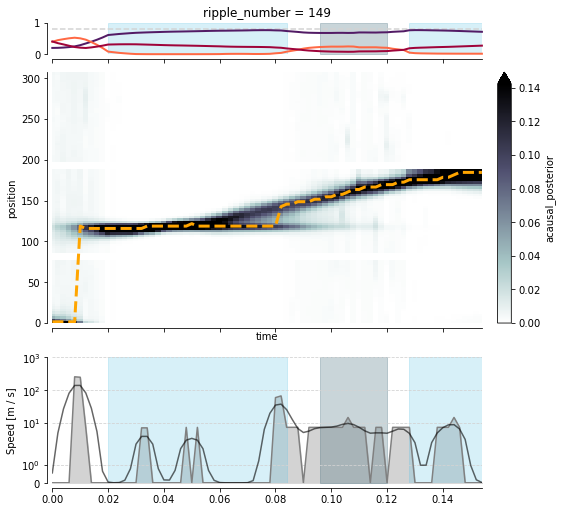

In [48]:
ripple_number = 149
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 472.397565515469,
 'Fragmented-Continuous-Mix_replay_speed': 684.4950492180715,
 'Hover-Continuous-Mix_replay_speed': 969.5100917652019}


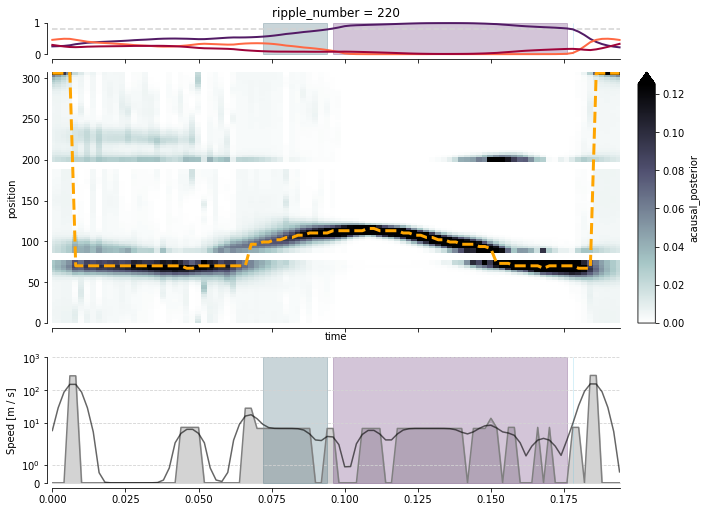

In [49]:
ripple_number = 220
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 714.0997701952801,
 'Fragmented-Continuous-Mix_replay_speed': 666.1649650841198,
 'Hover-Continuous-Mix_replay_speed': 0.0}


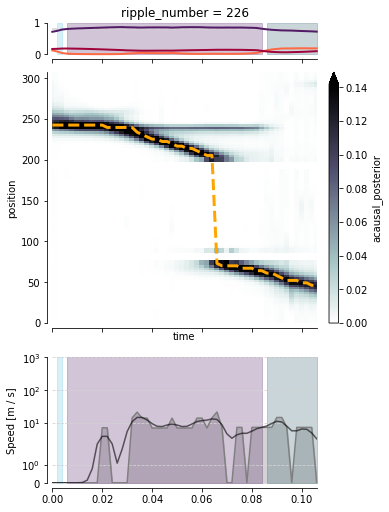

In [50]:
ripple_number = 226
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 393.19033524821987,
 'Fragmented-Continuous-Mix_replay_speed': 231.58066453966643,
 'Hover-Continuous-Mix_replay_speed': 0.0}


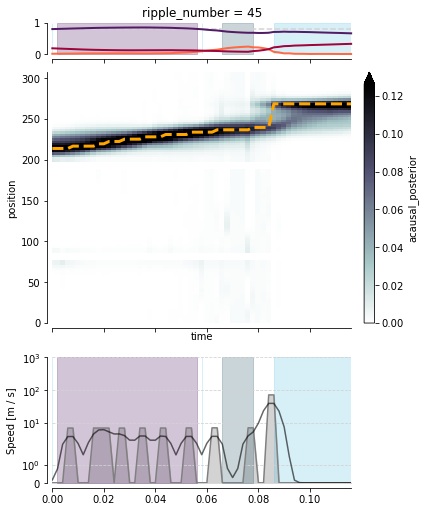

In [42]:
ripple_number = 45
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 310.77039338913164,
 'Hover-Continuous-Mix_replay_speed': 221.39731380471727}


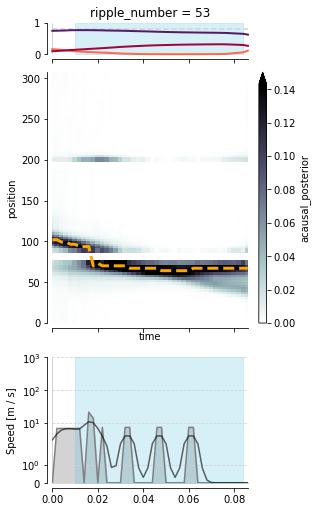

In [43]:
ripple_number = 53
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 669.0663686567243,
 'Fragmented-Continuous-Mix_replay_speed': 390.06664059541697,
 'Fragmented_replay_speed': 12903.323274702281,
 'Hover-Continuous-Mix_replay_speed': 4.052855649808076e-14,
 'Hover_replay_speed': 3.2556953517340594e-14}


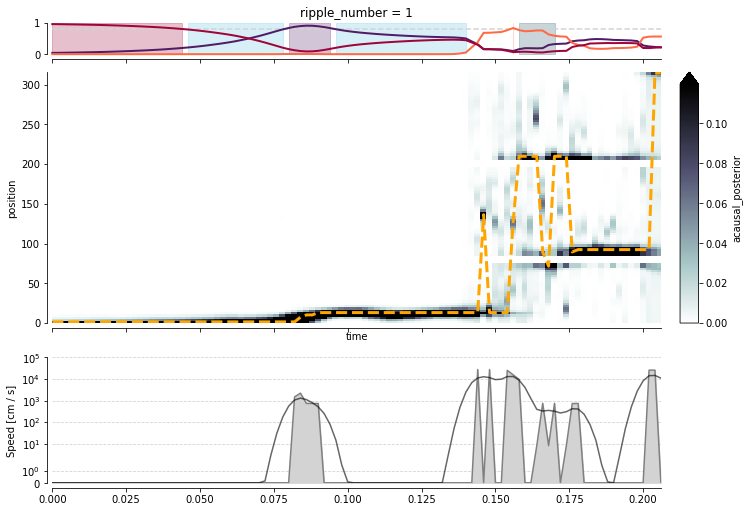

In [552]:
ripple_number = 1
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 20137.66887959216,
 'Fragmented_replay_speed': 15285.200626502077,
 'Hover-Continuous-Mix_replay_speed': 0.0}


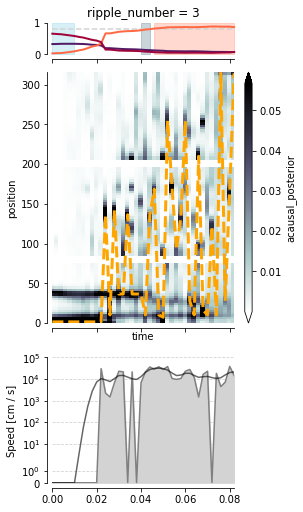

In [553]:
ripple_number = 3
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 402.5027710913371,
 'Hover-Continuous-Mix_replay_speed': 2.2031928075804172}


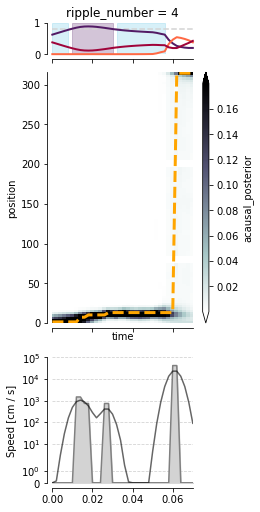

In [554]:
ripple_number = 4
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 8212.24112455902,
 'Fragmented_replay_speed': 13165.208987303646,
 'Hover-Continuous-Mix_replay_speed': 4.850015947882093e-14}


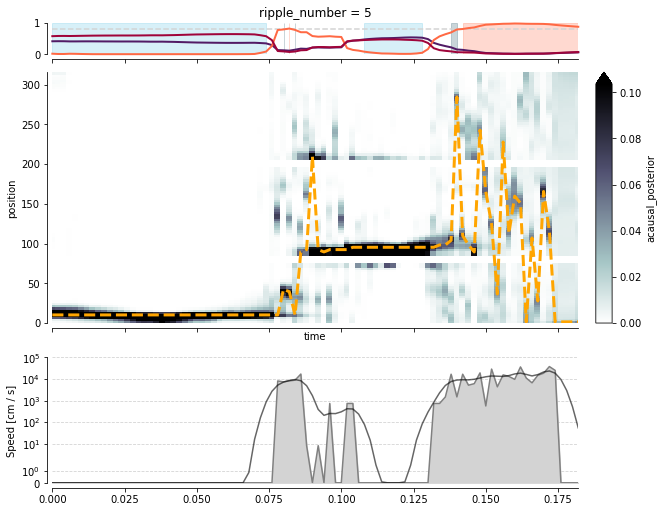

In [555]:
ripple_number = 5
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 7.98712891315605}


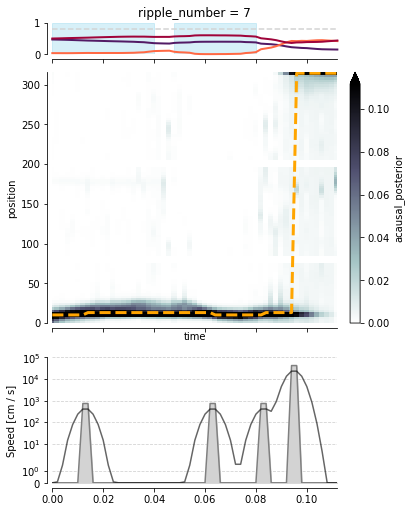

In [556]:
ripple_number = 7
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 92.48557573561203}


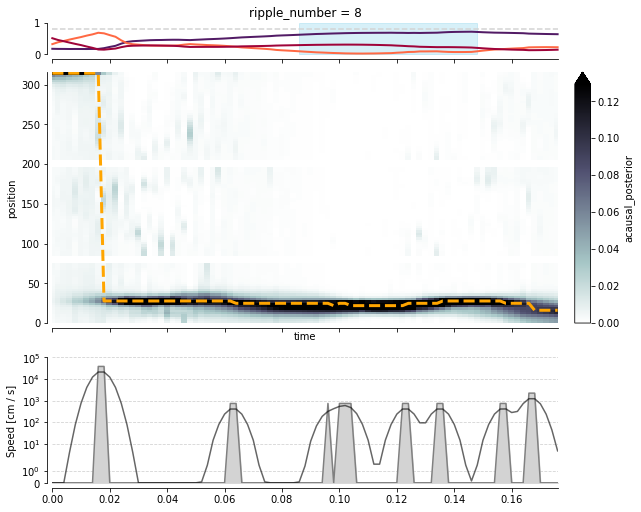

In [557]:
ripple_number = 8
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 3.4229253419505436e-14}


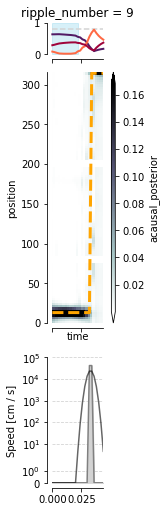

In [559]:
ripple_number = 9
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 8168.558378795772,
 'Hover-Continuous-Mix_replay_speed': 4.850015947882093e-14}


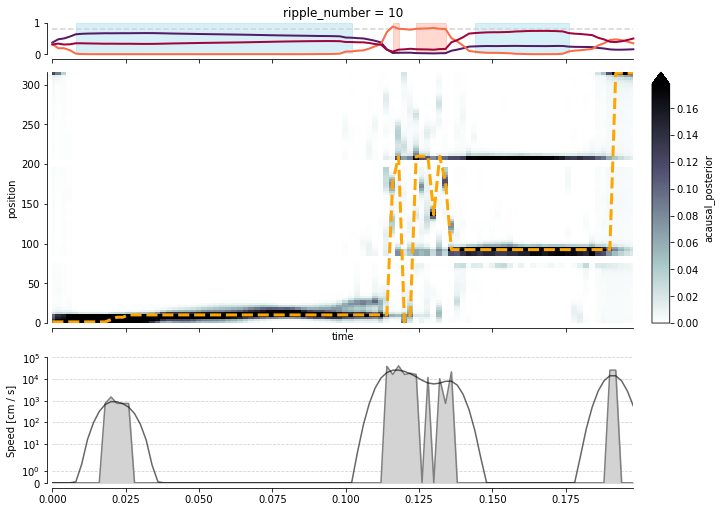

In [560]:
ripple_number = 10
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 10271.966505046148,
 'Hover-Continuous-Mix_replay_speed': 7.740301509913704e-14}


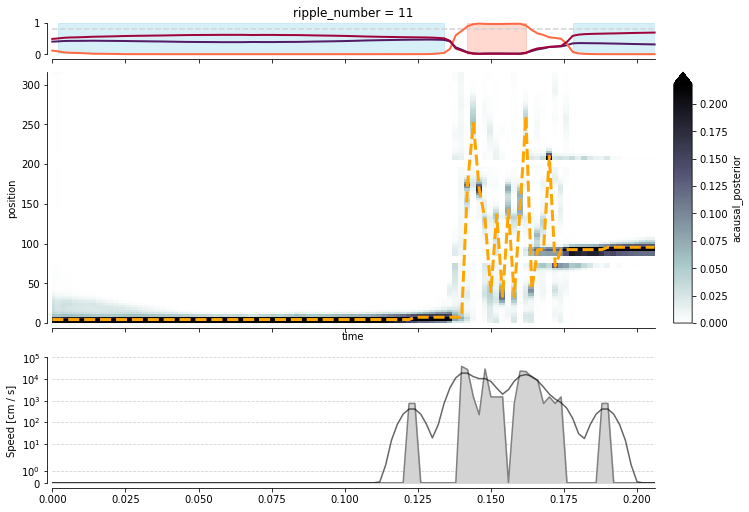

In [561]:
ripple_number = 11
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 8565.074303989582,
 'Hover-Continuous-Mix_replay_speed': 0.0}


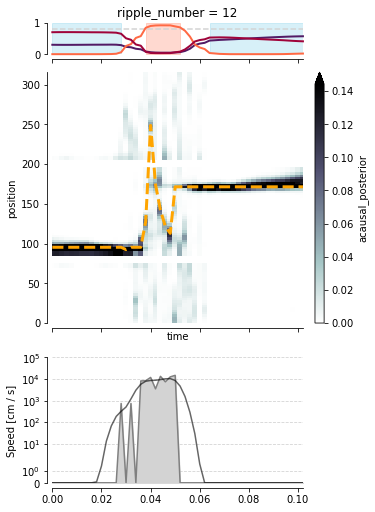

In [562]:
ripple_number = 12
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 1.4722511937714795}


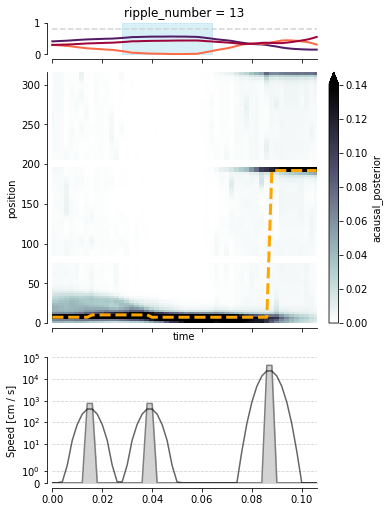

In [563]:
ripple_number = 13
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 234.92782270571536,
 'Fragmented-Continuous-Mix_replay_speed': 335.19042730455794,
 'Fragmented_replay_speed': 19055.735569571603,
 'Hover-Continuous-Mix_replay_speed': 7.211573543484492e-14,
 'Hover_replay_speed': 0.0}


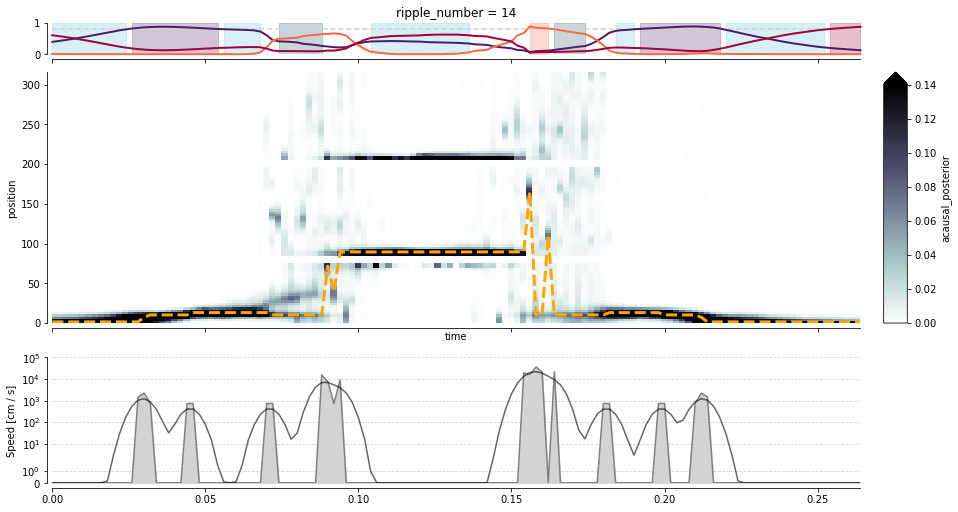

In [565]:
ripple_number = 14
plot_ripple(ripple_number, results, data)

{'Hover_replay_speed': 2.429863720995471e-14}


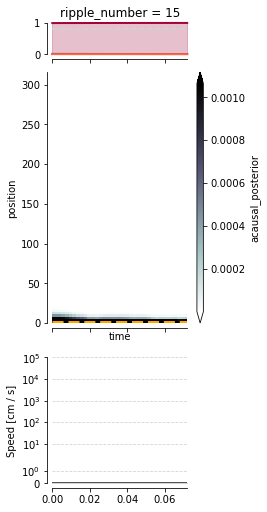

In [566]:
ripple_number = 15
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 247.97952990815605,
 'Hover-Continuous-Mix_replay_speed': 3.2556953517340594e-14}


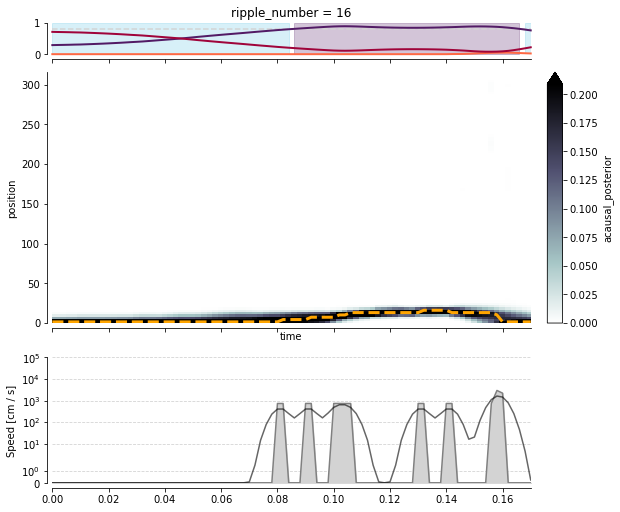

In [567]:
ripple_number = 16
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 5943.611286947396,
 'Hover-Continuous-Mix_replay_speed': 2.505251419245789e-13}


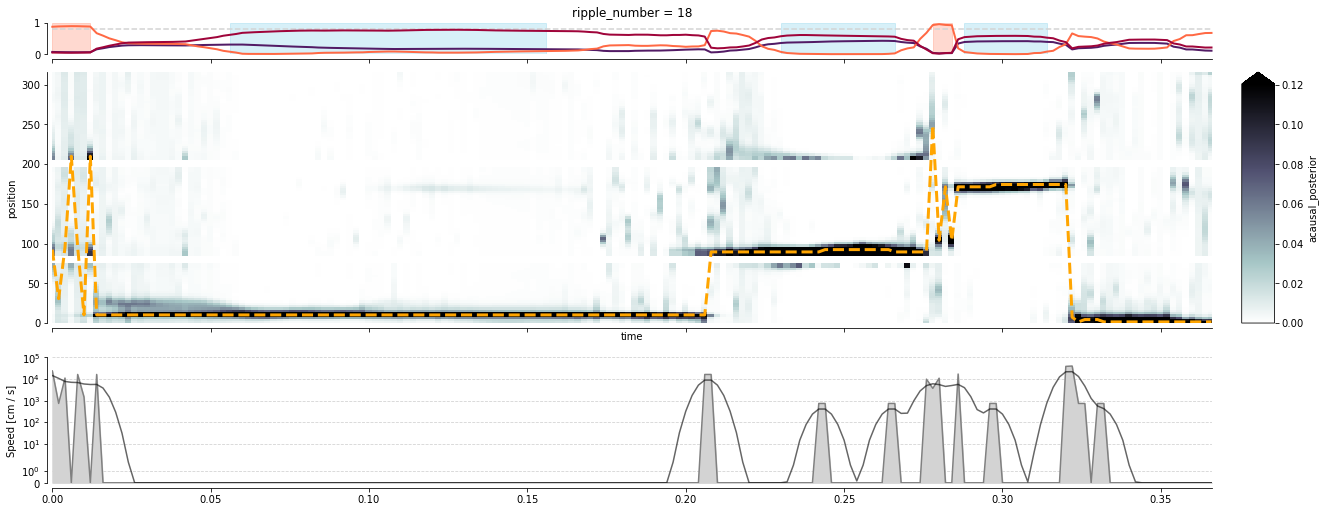

In [568]:
ripple_number = 18
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 10841.64384499637}


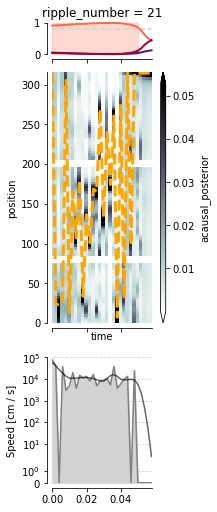

In [569]:
ripple_number = 21
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 5770.73352579422,
 'Fragmented_replay_speed': 22021.456575869597,
 'Hover-Continuous-Mix_replay_speed': 4.678346652713272e-13}


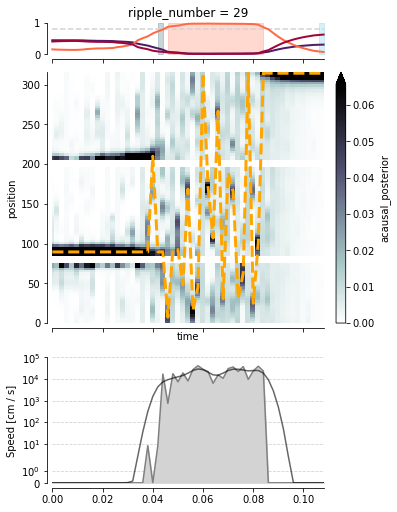

In [571]:
ripple_number = 29
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 1.474190372330309}


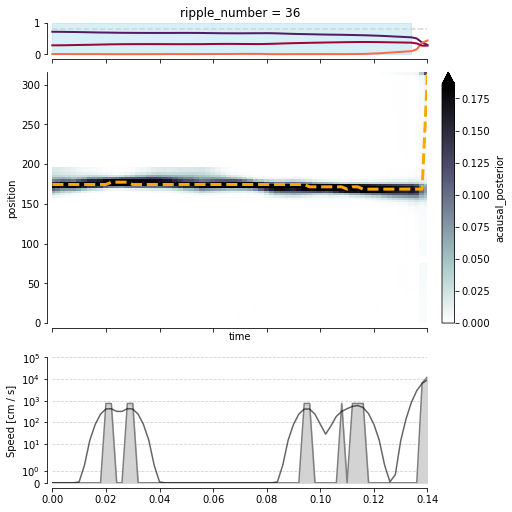

In [572]:
ripple_number = 36
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 452.0140018826685,
 'Fragmented-Continuous-Mix_replay_speed': 727.7989514991293,
 'Hover-Continuous-Mix_replay_speed': 488.12519870769484}


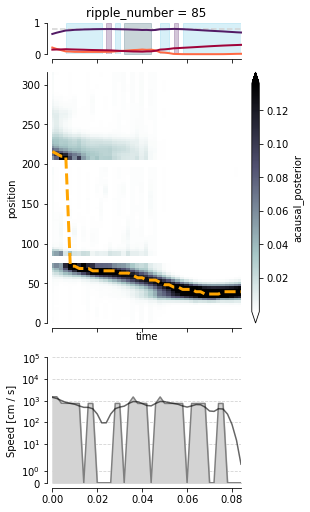

In [573]:
ripple_number = 85
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 415.58989919633404,
 'Hover-Continuous-Mix_replay_speed': 0.0}


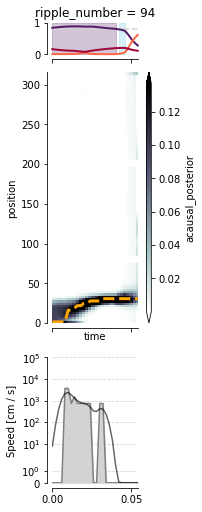

In [574]:
ripple_number = 94
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 11846.163178661982,
 'Fragmented_replay_speed': 7380.654097362169,
 'Hover-Continuous-Mix_replay_speed': 0.0}


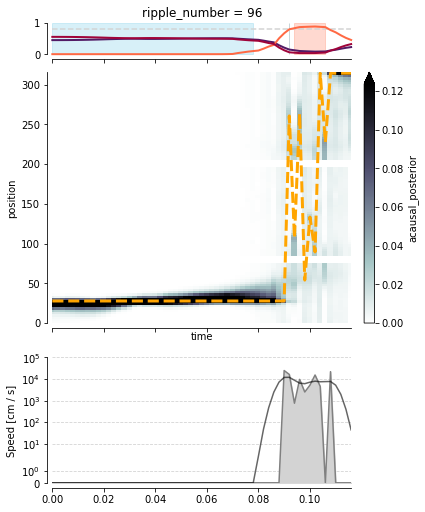

In [575]:
ripple_number = 96
plot_ripple(ripple_number, results, data)

{'Fragmented-Continuous-Mix_replay_speed': 634.8011356593174}


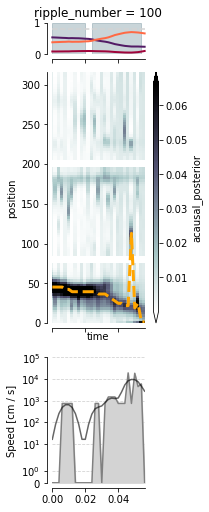

In [576]:
ripple_number = 100
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 411.02508851262263,
 'Hover-Continuous-Mix_replay_speed': 0.863460806243622}


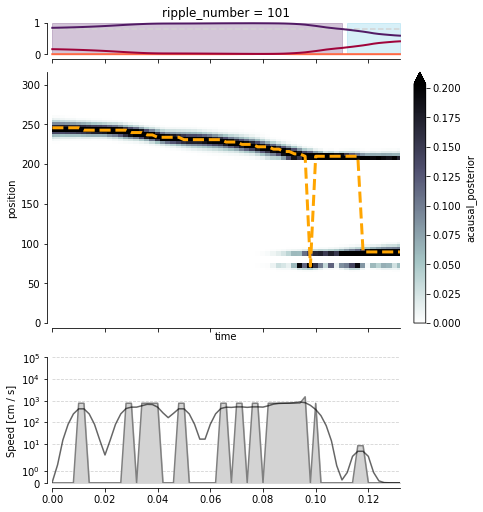

In [577]:
ripple_number = 101
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 417.94917152675475,
 'Fragmented-Continuous-Mix_replay_speed': 1127.6452195745737,
 'Hover-Continuous-Mix_replay_speed': 1.4700294867390997}


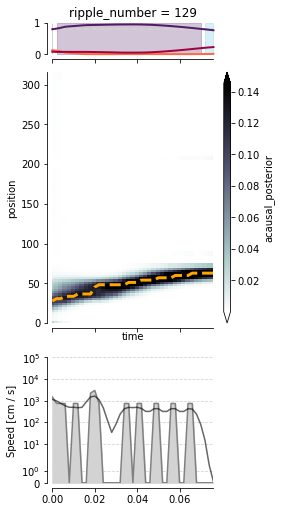

In [578]:
ripple_number = 129
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 491.2563771729606,
 'Hover-Continuous-Mix_replay_speed': 3.8839077555816053e-13}


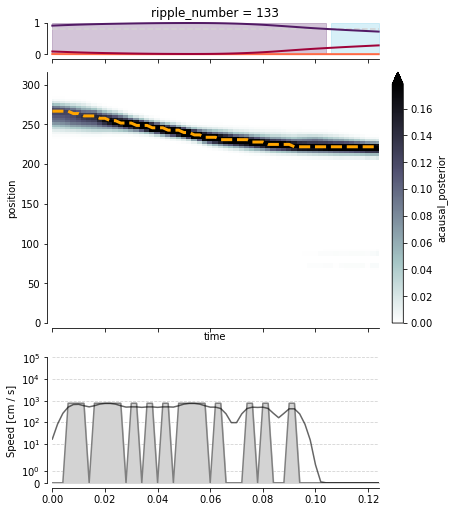

In [579]:
ripple_number = 133
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 403.2584672303283,
 'Hover-Continuous-Mix_replay_speed': 1.5850720709101929e-12}


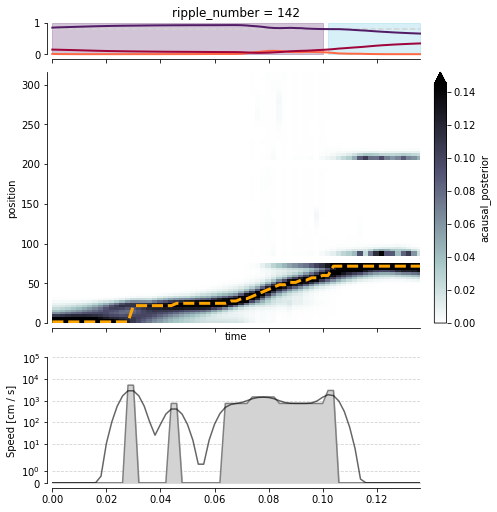

In [580]:
ripple_number = 142
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 491.9057574713106,
 'Hover-Continuous-Mix_replay_speed': 335.0382819081361}


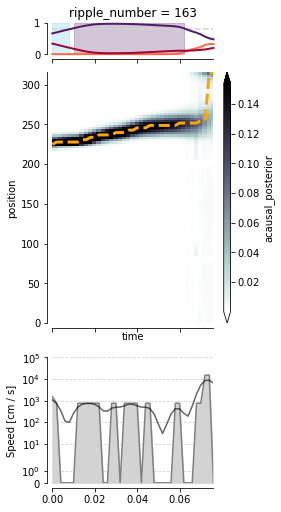

In [581]:
ripple_number = 163
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 404.36566956521585}


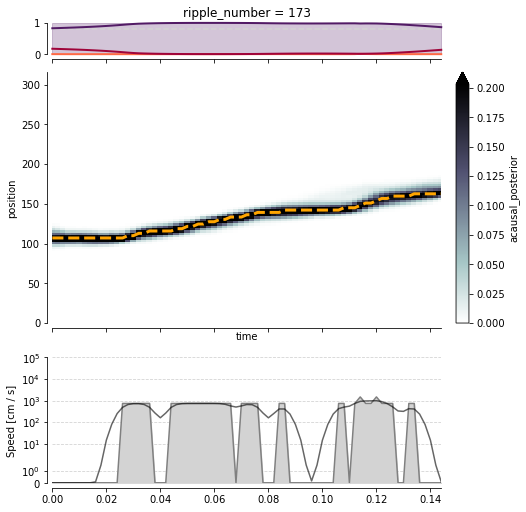

In [582]:
ripple_number = 173
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 1.7864008631037985e-12}


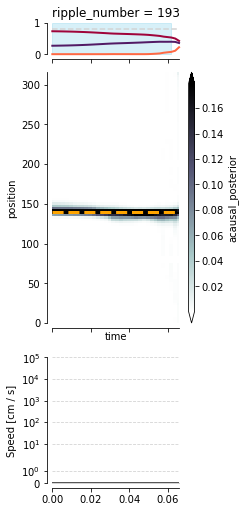

In [584]:
ripple_number = 193
plot_ripple(ripple_number, results, data)

In [594]:
replay_info.loc[
    replay_info.Hover_replay_total_distance > 10
].Hover_replay_total_distance

Animal ID  day  epoch  ripple_number
cor        7    2      29               210.487138
                       132              115.126645
bon        4    2      20               157.992292
           5    4      235              171.194066
           6    2      16               177.767841
                6      186               47.270964
           7    4      20                69.394945
                       170               69.394945
           8    2      98                72.242532
           9    4      150               66.456660
           10   4      214               67.389779
cha        4    4      175               89.179204
con        2    2      32               331.811944
           4    2      21                33.099872
dav        7    9      71               100.059321
fra        11   2      79               102.608412
           12   4      198              185.770012
gov        10   4      141              175.671101
                6      12               125.6

In [595]:
from src.load_data import load_data

epoch_key = "remy", 35, 2

data = load_data(epoch_key)

In [596]:
import xarray as xr

animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 109, ripple_number: 344, state: 3, time: 132)
Coordinates:
  * position           (position) float64 1.464 4.391 7.319 ... 338.4 341.3
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.262000
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 340 341 342 343 344
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Hover-Continuous-Mix_replay_speed': 949.7270011371508,
 'Hover_replay_speed': 3.132172867381601e-14}


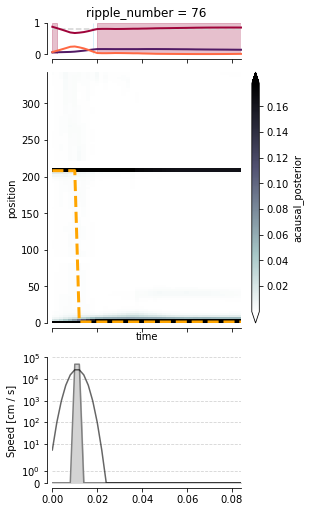

In [597]:
ripple_number = 76
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 2.5560448499526375e-12,
 'Hover_replay_speed': 3.8839077555816053e-13}


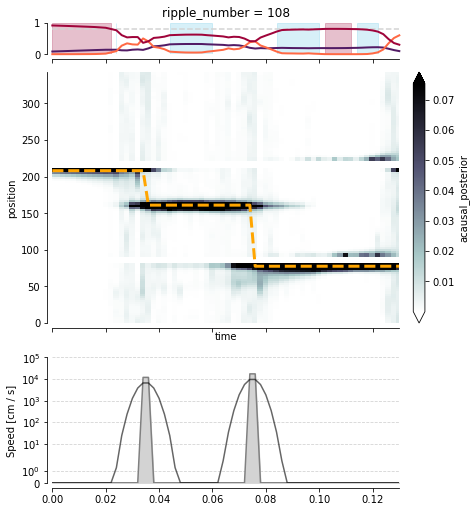

In [598]:
ripple_number = 108
plot_ripple(ripple_number, results, data)

{'Hover_replay_speed': 8.130300088445834e-13}


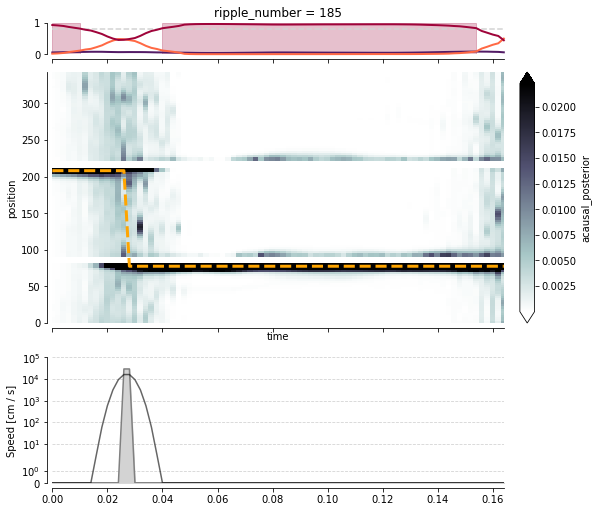

In [599]:
ripple_number = 185
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 2554.888235625641,
 'Hover_replay_speed': 1.833236188596994e-14}


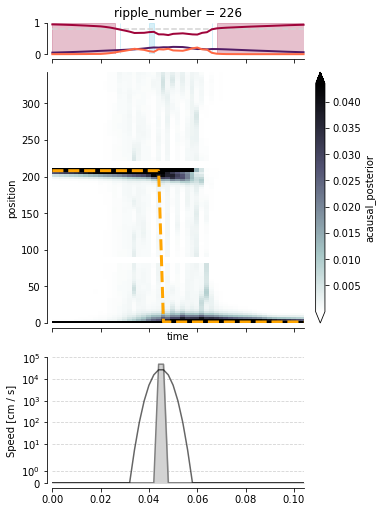

In [600]:
ripple_number = 226
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 3.959931109454042e-14,
 'Hover_replay_speed': 4.2721157773548856e-14}


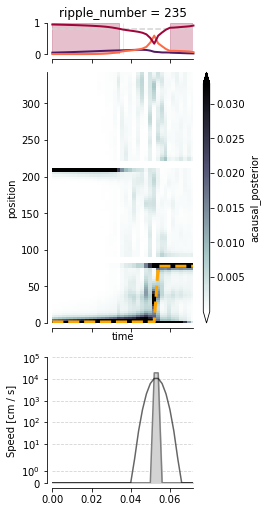

In [625]:
ripple_number = 235
plot_ripple(ripple_number, results, data)

{'Hover-Continuous-Mix_replay_speed': 2.5647551536445756,
 'Hover_replay_speed': 3.034898527832004e-14}


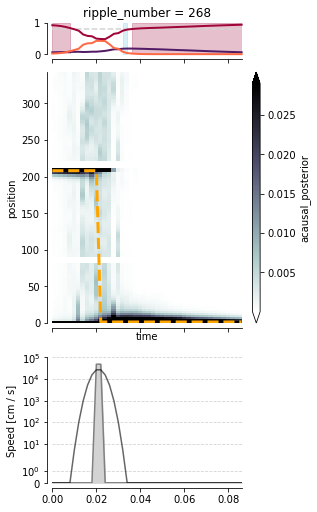

In [626]:
ripple_number = 268
plot_ripple(ripple_number, results, data)

In [624]:
posterior = (
    results.sel(ripple_number=ripple_number)
    .acausal_posterior.dropna("time", how="all")
    .assign_coords(time=lambda ds: ds.time / np.timedelta64(1, "s"))
)
probability_threshold = 0.8

probability = get_probability(results.sel(ripple_number=ripple_number))
is_classified = get_is_classified(probability, probability_threshold)
is_classified = is_classified.dropna("time", how="all").assign_coords(
    time=lambda ds: ds.time / np.timedelta64(1, "s")
)
probability = probability.dropna("time", how="all").assign_coords(
    time=lambda ds: ds.time / np.timedelta64(1, "s")
)

metrics = {}
for state, above_threshold in is_classified.groupby("state"):
    above_threshold = above_threshold.astype(bool).values.squeeze()
    if np.any(above_threshold):
        metrics[f"{state}_Hov_avg_prob"] = float(
            probability.sel(state="Hover").isel(time=above_threshold).mean()
        )
        metrics[f"{state}_Cont_avg_prob"] = float(
            probability.sel(state="Continuous").isel(time=above_threshold).mean()
        )
        metrics[f"{state}_Frag_avg_prob"] = float(
            probability.sel(state="Fragmented").isel(time=above_threshold).mean()
        )

metrics

{'Hover_Hov_avg_prob': 0.8947406325944458,
 'Hover_Cont_avg_prob': 0.09985850077307885,
 'Hover_Frag_avg_prob': 0.005400866632475356,
 'Hover-Continuous-Mix_Hov_avg_prob': 0.7473731348618164,
 'Hover-Continuous-Mix_Cont_avg_prob': 0.17747801953702605,
 'Hover-Continuous-Mix_Frag_avg_prob': 0.0751488456011574}

In [632]:
from src.load_data import load_data
import xarray as xr

epoch_key = "remy", 36, 2

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 109, ripple_number: 307, state: 3, time: 151)
Coordinates:
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.300000
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * position           (position) float64 1.464 4.391 7.319 ... 338.4 341.3
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 303 304 305 306 307
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Hover_replay_speed': 10232.328970459566}


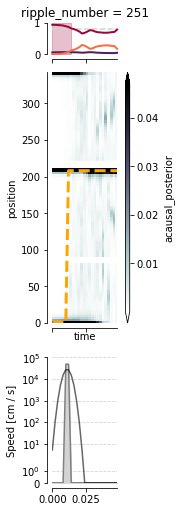

In [633]:
ripple_number = 251
plot_ripple(ripple_number, results, data)

{'Hover_replay_speed': 2.428646534346742e-14}


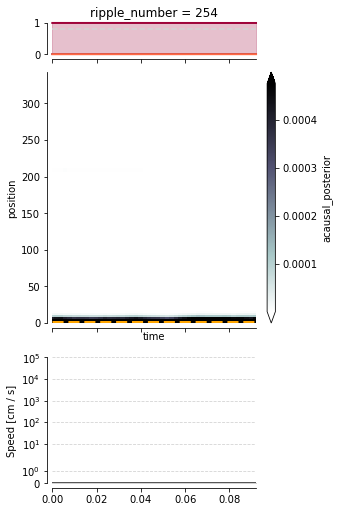

In [634]:
ripple_number = 254
plot_ripple(ripple_number, results, data)

In [635]:
replay_info.loc[replay_info.Fragmented_replay_speed < 20].Fragmented_replay_speed

Animal ID  day  epoch  ripple_number
cor        3    4      21               4.167290e-12
           4    4      130              6.351066e-12
           8    2      198              1.782737e-12
bon        4    6      102              1.504025e+00
           5    6      89               0.000000e+00
                       111              3.995485e-02
           6    4      55               2.428647e-14
                6      53               3.255695e-14
           7    4      224              3.749267e-14
                       236              0.000000e+00
           8    6      17               1.419990e+00
           9    2      215              1.780477e+01
                4      240              0.000000e+00
                6      60               0.000000e+00
cha        4    4      32               1.633778e-12
                       82               0.000000e+00
                       87               2.290048e-16
           8    2      13               3.605787e-14
         

In [636]:
from src.load_data import load_data
import xarray as xr

epoch_key = "cha", 8, 4

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 101, ripple_number: 176, state: 3, time: 173)
Coordinates:
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * position           (position) float64 1.463 4.388 7.313 ... 314.7 317.6
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.344000
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 172 173 174 175 176
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Continuous_replay_speed': 322.1979693970564,
 'Fragmented-Continuous-Mix_replay_speed': 3070.3344676166357,
 'Fragmented_replay_speed': 0.0,
 'Hover-Continuous-Mix_replay_speed': 197.34596775740576}


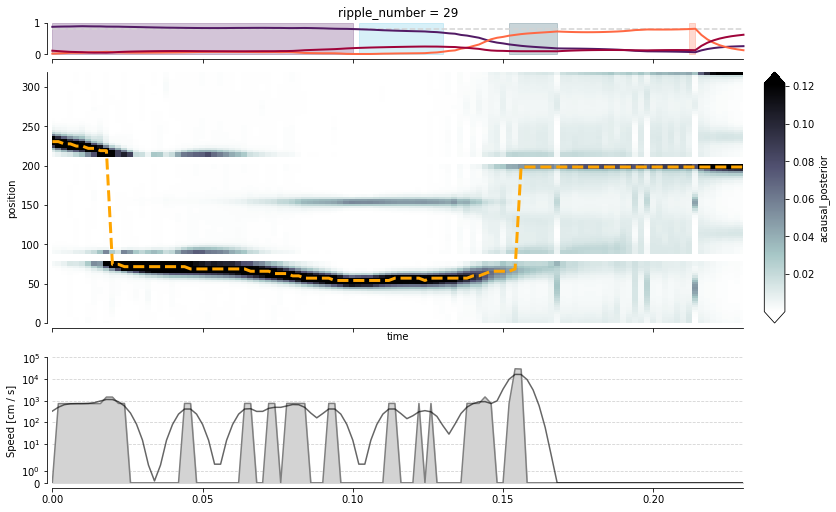

In [637]:
ripple_number = 29
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 1.553944282254322e-12}


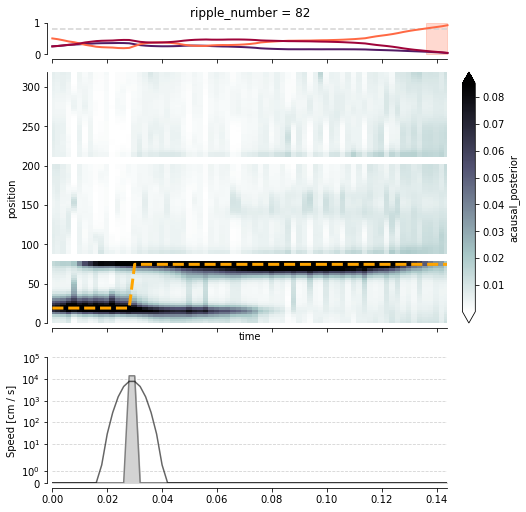

In [638]:
ripple_number = 82
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 2.4826215535364585e-15,
 'Hover-Continuous-Mix_replay_speed': 0.0}


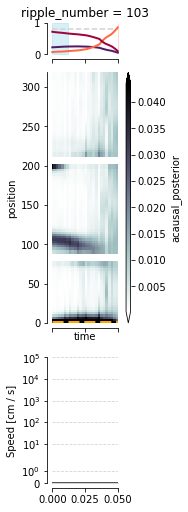

In [639]:
ripple_number = 103
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 1.2171866487285415e-17,
 'Hover-Continuous-Mix_replay_speed': 4.862713892561242e-14}


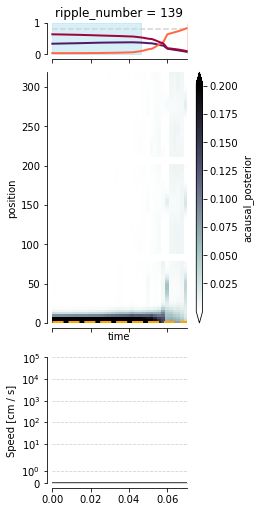

In [640]:
ripple_number = 139
plot_ripple(ripple_number, results, data)

{'Fragmented_replay_speed': 0.0}


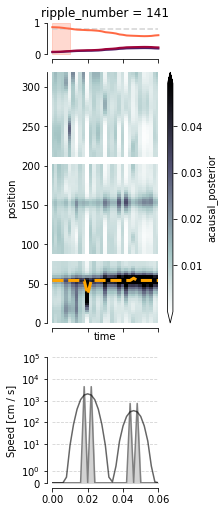

In [641]:
ripple_number = 141
plot_ripple(ripple_number, results, data)

In [642]:
from src.load_data import load_data
import xarray as xr

epoch_key = "bon", 4, 6

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 101, ripple_number: 222, state: 3, time: 183)
Coordinates:
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.364000
  * position           (position) float64 1.452 4.357 7.261 ... 312.5 315.4
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 218 219 220 221 222
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Fragmented_replay_speed': 1.5040248731561257}


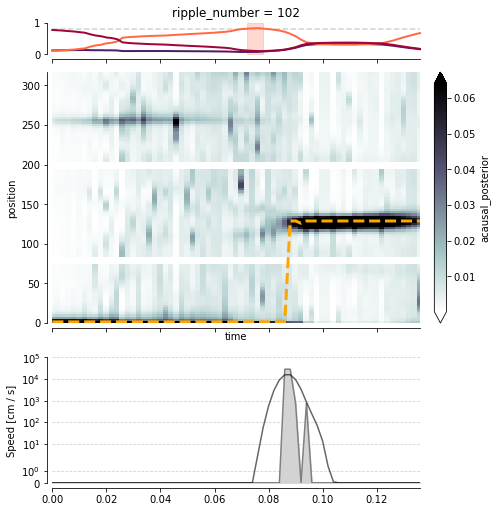

In [643]:
ripple_number = 102
plot_ripple(ripple_number, results, data)

In [655]:
replay_info.loc[
    replay_info.Continuous_replay_speed < 20
].Continuous_replay_speed.index.tolist()

[('cor', 1, 4, 32),
 ('cor', 1, 4, 98),
 ('cor', 1, 4, 130),
 ('cor', 1, 4, 199),
 ('cor', 1, 4, 261),
 ('cor', 2, 2, 60),
 ('cor', 2, 4, 60),
 ('cor', 2, 4, 87),
 ('cor', 3, 4, 81),
 ('cor', 3, 4, 251),
 ('cor', 7, 2, 159),
 ('cor', 8, 2, 53),
 ('cor', 8, 2, 135),
 ('bon', 3, 2, 37),
 ('bon', 3, 2, 135),
 ('bon', 3, 2, 167),
 ('bon', 3, 4, 1),
 ('bon', 3, 4, 5),
 ('bon', 3, 4, 51),
 ('bon', 3, 4, 72),
 ('bon', 3, 4, 160),
 ('bon', 3, 4, 161),
 ('bon', 3, 4, 236),
 ('bon', 3, 4, 240),
 ('bon', 3, 4, 263),
 ('bon', 4, 2, 88),
 ('bon', 4, 2, 105),
 ('bon', 4, 2, 141),
 ('bon', 4, 2, 187),
 ('bon', 4, 4, 23),
 ('bon', 4, 4, 112),
 ('bon', 4, 4, 139),
 ('bon', 4, 4, 172),
 ('bon', 4, 6, 132),
 ('bon', 5, 2, 181),
 ('bon', 5, 4, 7),
 ('bon', 5, 4, 109),
 ('bon', 5, 4, 129),
 ('bon', 5, 4, 138),
 ('bon', 5, 4, 193),
 ('bon', 5, 4, 222),
 ('bon', 5, 4, 227),
 ('bon', 5, 6, 150),
 ('bon', 6, 2, 103),
 ('bon', 6, 4, 176),
 ('bon', 6, 6, 112),
 ('bon', 7, 2, 14),
 ('bon', 7, 2, 18),
 ('bon', 7, 

In [645]:
from src.load_data import load_data
import xarray as xr

epoch_key = "Cor", 1, 4

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 97, ripple_number: 303, state: 3, time: 130)
Coordinates:
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.258000
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * position           (position) float64 1.491 4.474 7.457 ... 303.2 306.0
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 299 300 301 302 303
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Continuous_replay_speed': 6.068605868096258e-15,
 'Hover-Continuous-Mix_replay_speed': 2.4289508310089244e-14}


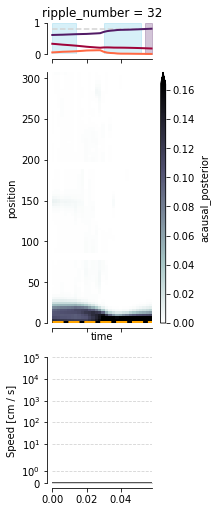

In [646]:
ripple_number = 32
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 14.779726882241107,
 'Hover-Continuous-Mix_replay_speed': 412.40455410988716}


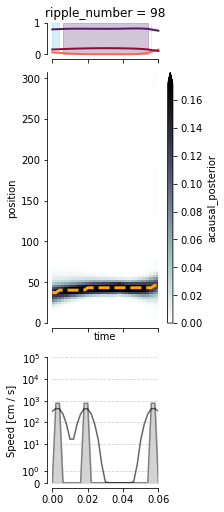

In [647]:
ripple_number = 98
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 13.710292390398065}


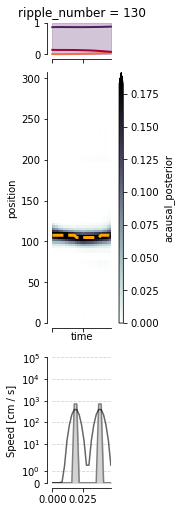

In [648]:
ripple_number = 130
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 0.751495919223822,
 'Hover-Continuous-Mix_replay_speed': 0.0}


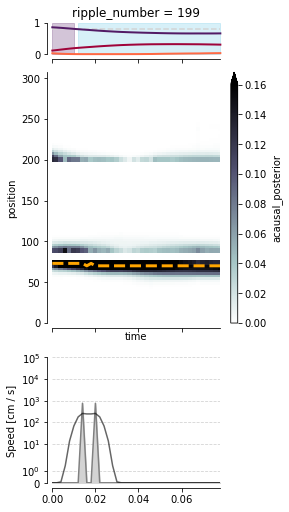

In [649]:
ripple_number = 199
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 9.716552158884993e-13}


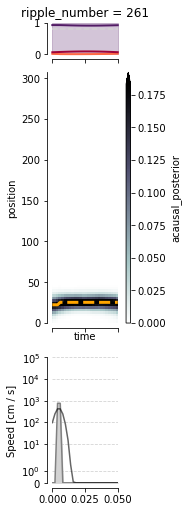

In [650]:
ripple_number = 261
plot_ripple(ripple_number, results, data)

In [651]:
from src.load_data import load_data
import xarray as xr

epoch_key = "remy", 35, 2

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 109, ripple_number: 344, state: 3, time: 132)
Coordinates:
  * position           (position) float64 1.464 4.391 7.319 ... 338.4 341.3
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.262000
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 340 341 342 343 344
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Continuous_replay_speed': 0.07875569022286776,
 'Hover-Continuous-Mix_replay_speed': 235.75021938744402}


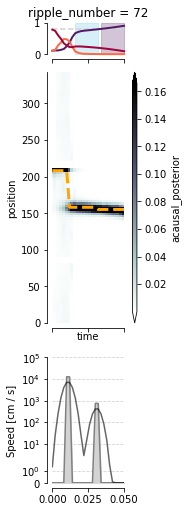

In [652]:
ripple_number = 72
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 1.65587790952043,
 'Hover-Continuous-Mix_replay_speed': 237.92328154310502}


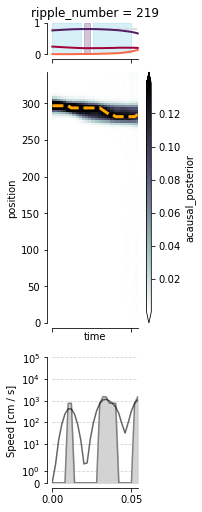

In [653]:
ripple_number = 219
plot_ripple(ripple_number, results, data)

In [656]:
from src.load_data import load_data
import xarray as xr

epoch_key = "bon", 8, 4

data = load_data(epoch_key)


animal, day, epoch = epoch_key
data_type, dim = "clusterless", "1D"

results = xr.open_dataset(
    os.path.join(PROCESSED_DATA_DIR, f"{animal}_{day:02}_{epoch:02}.nc"),
    group=f"/{data_type}/{dim}/classifier/ripples/",
)

results

<xarray.Dataset>
Dimensions:            (position: 98, ripple_number: 250, state: 3, time: 132)
Coordinates:
  * state              (state) object 'Continuous' 'Fragmented' 'Hover'
  * time               (time) timedelta64[ns] 00:00:00 ... 00:00:00.262000
  * position           (position) float64 1.448 4.344 7.24 ... 298.2 301.2 304.1
  * ripple_number      (ripple_number) int64 1 2 3 4 5 6 ... 246 247 248 249 250
Data variables:
    acausal_posterior  (ripple_number, time, state, position) float64 ...

{'Continuous_replay_speed': 0.0,
 'Fragmented-Continuous-Mix_replay_speed': 94.22956031531905,
 'Fragmented_replay_speed': 16212.740780924032,
 'Hover-Continuous-Mix_replay_speed': 1.822394540861481e-14}


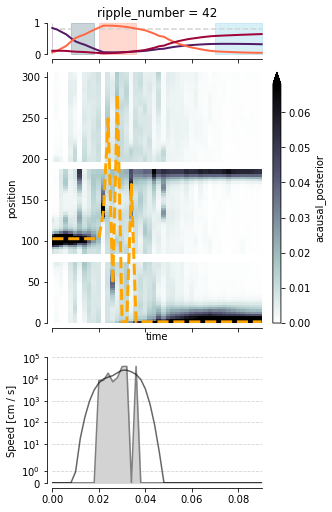

In [658]:
ripple_number = 42
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 0.0,
 'Hover-Continuous-Mix_replay_speed': 5.190792177078691e-13}


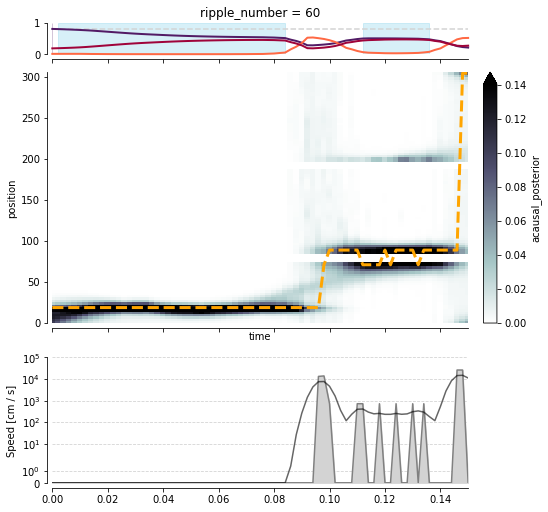

In [659]:
ripple_number = 60
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 5.010502838491578e-13,
 'Fragmented-Continuous-Mix_replay_speed': 315.2368519947062,
 'Hover-Continuous-Mix_replay_speed': 2.842170943040401e-14}


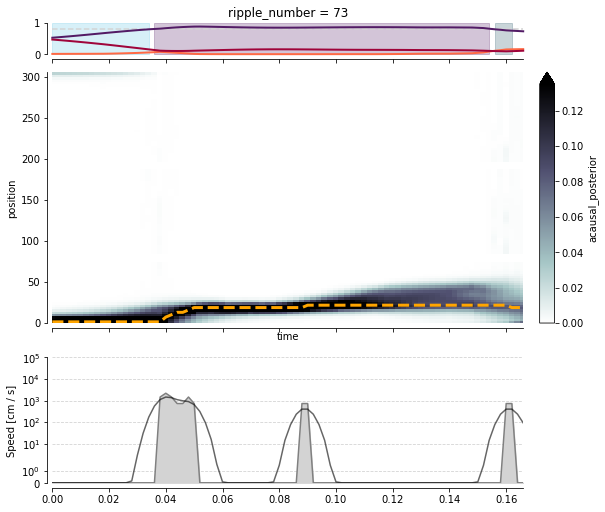

In [660]:
ripple_number = 73
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 0.07765833048011483}


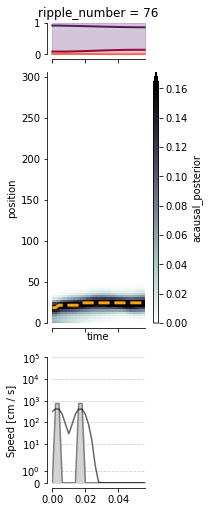

In [661]:
ripple_number = 76
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 0.23253865107674254,
 'Hover-Continuous-Mix_replay_speed': 6.029417192120998e-17}


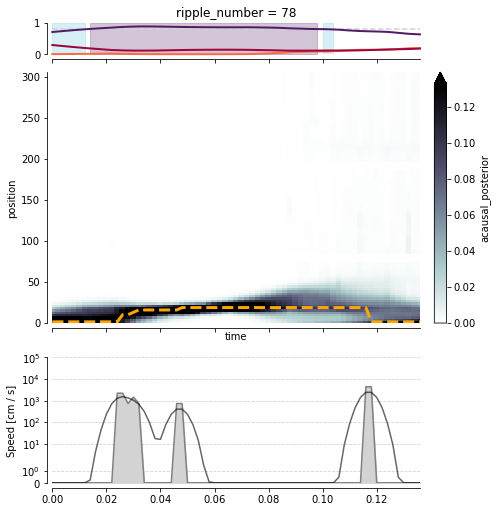

In [662]:
ripple_number = 78
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 0.7674379601598005}


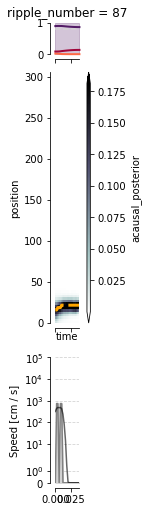

In [663]:
ripple_number = 87
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 4.868746594914166e-17,
 'Hover-Continuous-Mix_replay_speed': 5.998826413763802e-13}


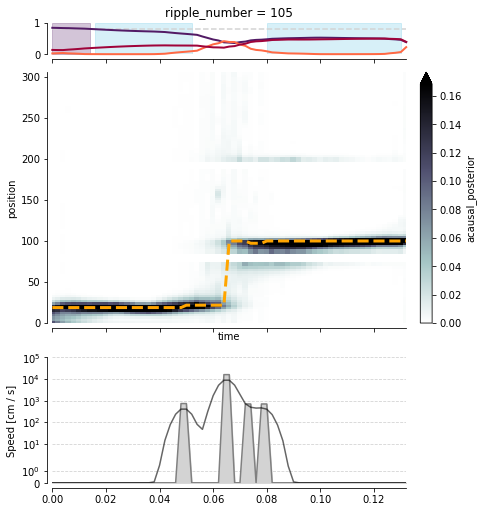

In [664]:
ripple_number = 105
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 14.350992969071232,
 'Hover-Continuous-Mix_replay_speed': 398.5926370678246}


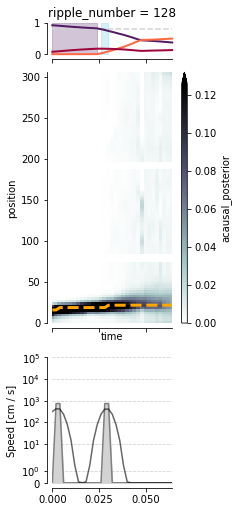

In [665]:
ripple_number = 128
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 1.4582988010922888,
 'Fragmented-Continuous-Mix_replay_speed': 1173.824759203925,
 'Hover-Continuous-Mix_replay_speed': 0.0}


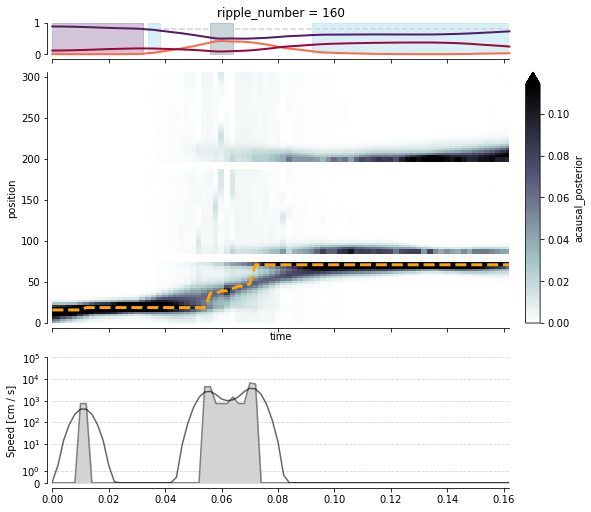

In [666]:
ripple_number = 160
plot_ripple(ripple_number, results, data)

{'Continuous_replay_speed': 14.342273663751813,
 'Fragmented-Continuous-Mix_replay_speed': 77.16513526891161,
 'Hover-Continuous-Mix_replay_speed': 554.5094338398509}


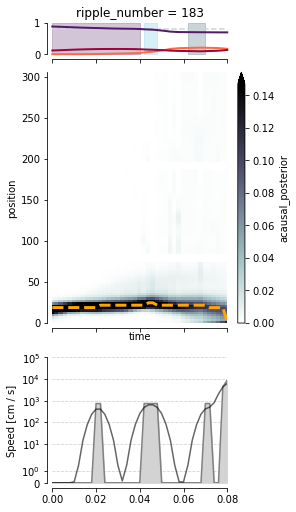

In [667]:
ripple_number = 183
plot_ripple(ripple_number, results, data)

In [748]:
def plot_estimated_speed(time_bin=0.002, position_bin=3, duration=0.100):
    fig, axes = plt.subplots(
        3, 2, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 5)
    )
    speeds = np.asarray([10, 50, 100, 500, 1000, 10_000])  # cm / s

    for ax, speed in zip(axes.flat, speeds):
        t = np.arange(0, duration + time_bin, time_bin)
        p = np.cumsum(np.ones_like(t) * speed * time_bin)
        bins = np.arange(0, duration * speeds[-1] + position_bin, position_bin)
        bin_centers = bins[:-1] + np.diff(bins) / 2
        p_binned = bin_centers[np.digitize(p, bins[1:-1])]
        s = np.gradient(p_binned, t)
        ax.plot(t, s)
        ax.set_yscale("symlog")
        ax.set_title(f"True = {speed} cm/s,\nEstimated = {np.mean(s):0.1f} cm/s")
    sns.despine(offset=5)
    plt.suptitle(f"Position bin = {position_bin} cm, Duration = {duration} s")

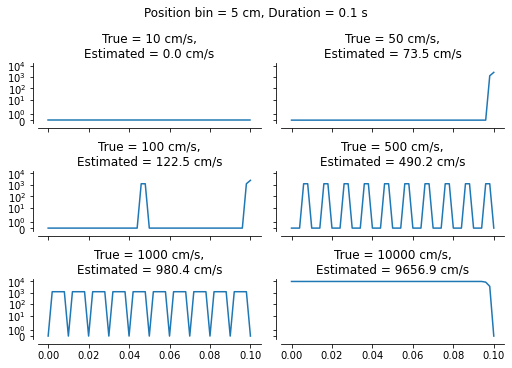

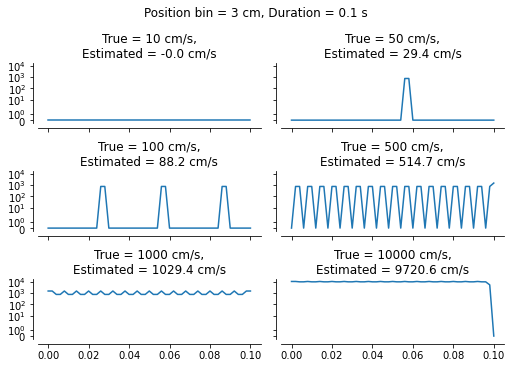

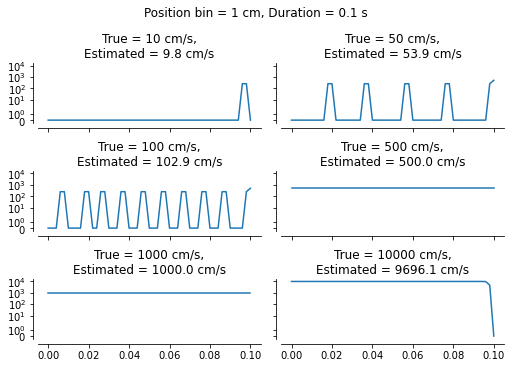

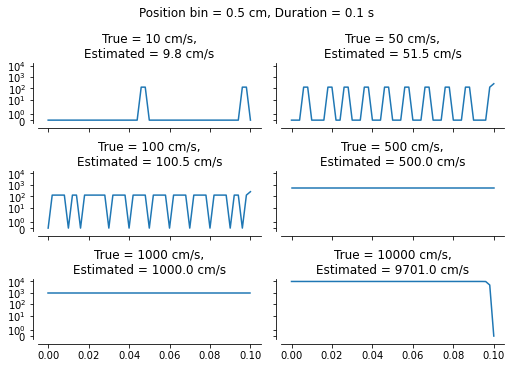

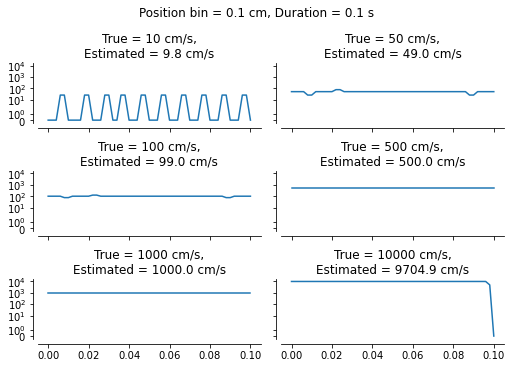

In [751]:
bin_size = [5, 3, 1, 0.5, 0.1]

for bs in bin_size:
    plot_estimated_speed(time_bin=0.002, position_bin=bs, duration=0.100)

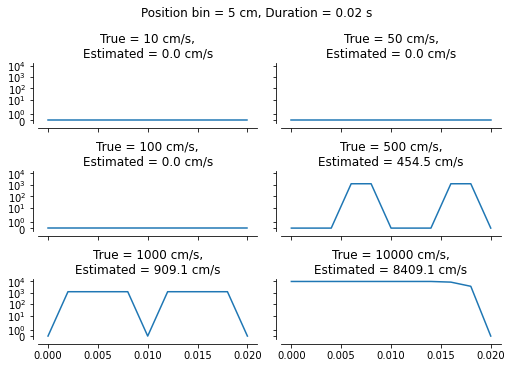

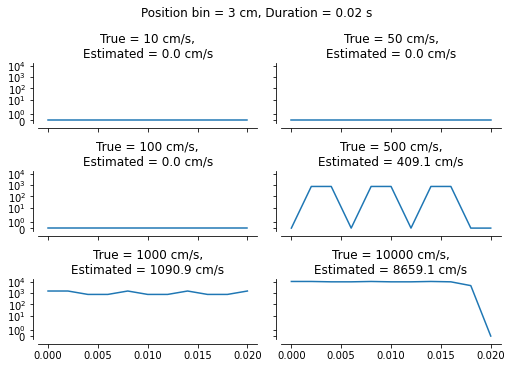

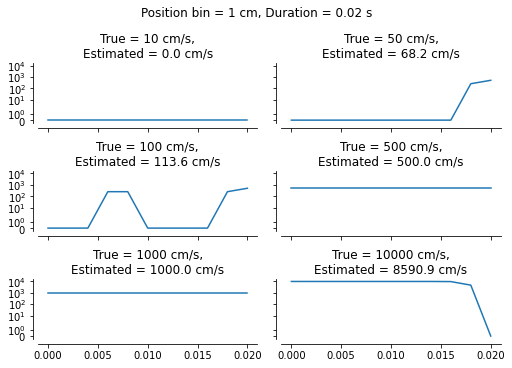

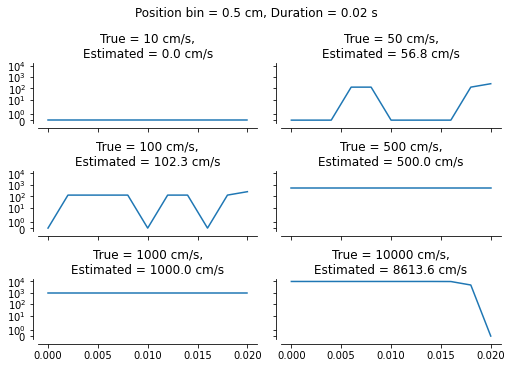

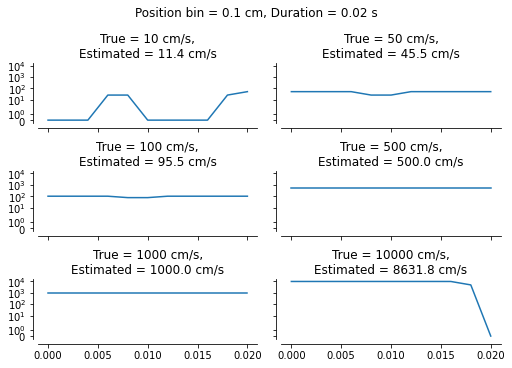

In [758]:
bin_size = [5, 3, 1, 0.5, 0.1]

for bs in bin_size:
    plot_estimated_speed(time_bin=0.002, position_bin=bs, duration=0.020)

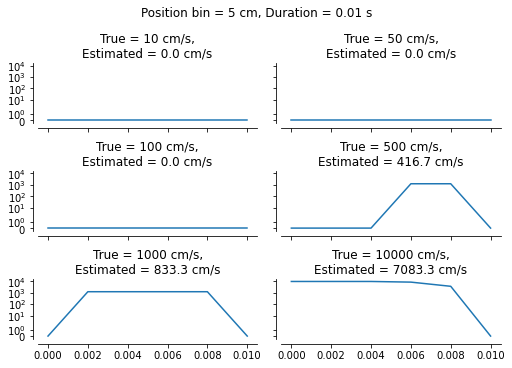

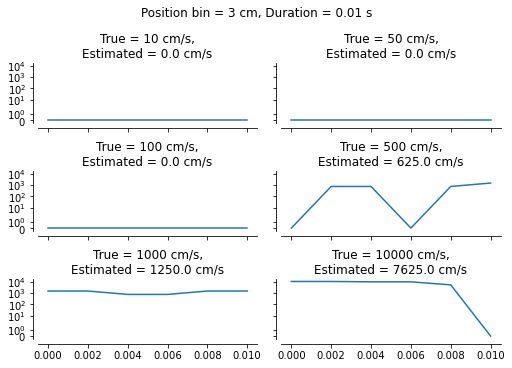

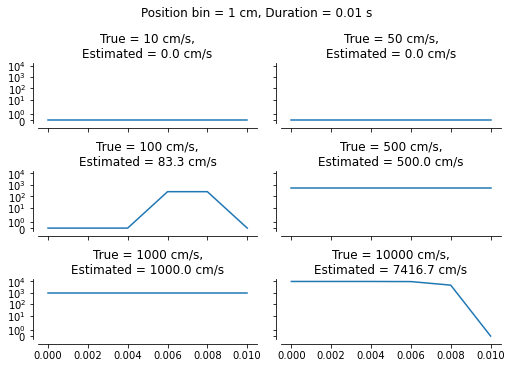

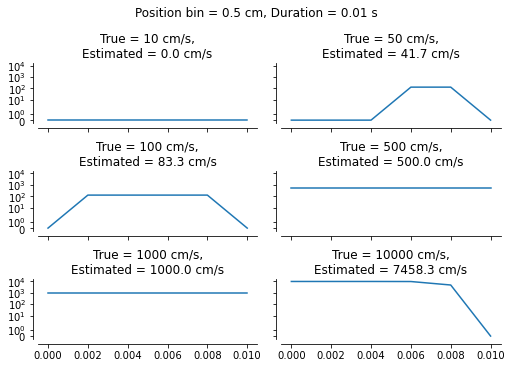

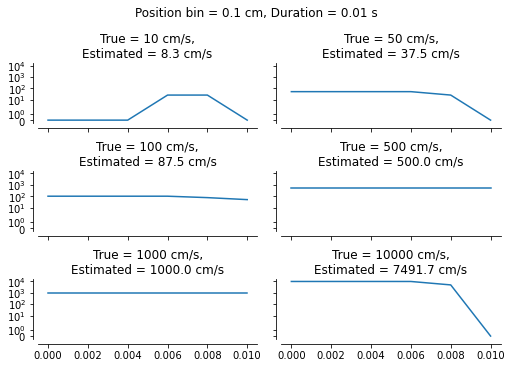

In [759]:
bin_size = [5, 3, 1, 0.5, 0.1]

for bs in bin_size:
    plot_estimated_speed(time_bin=0.002, position_bin=bs, duration=0.010)

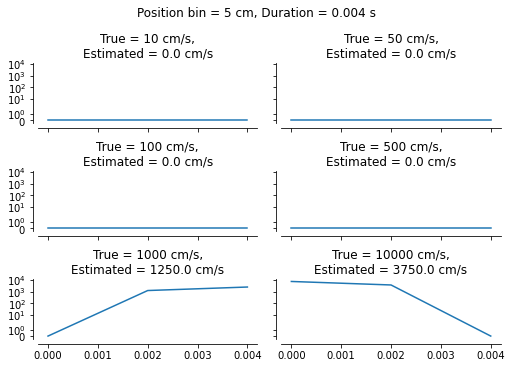

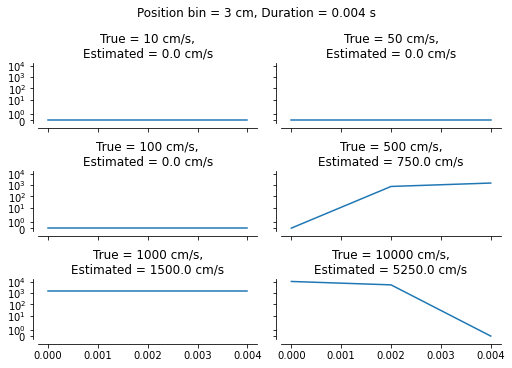

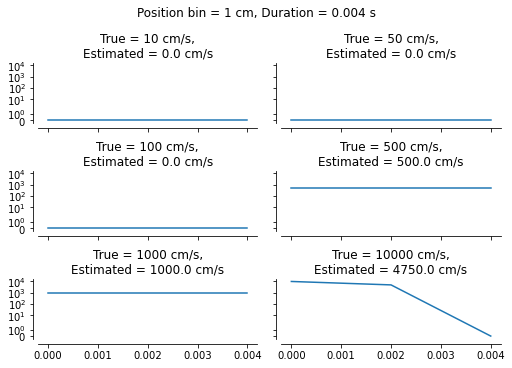

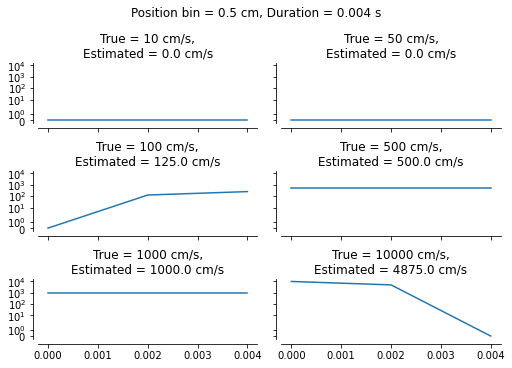

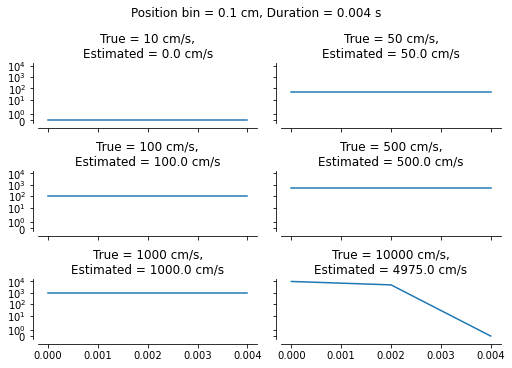

In [760]:
bin_size = [5, 3, 1, 0.5, 0.1]

for bs in bin_size:
    plot_estimated_speed(time_bin=0.002, position_bin=bs, duration=0.004)

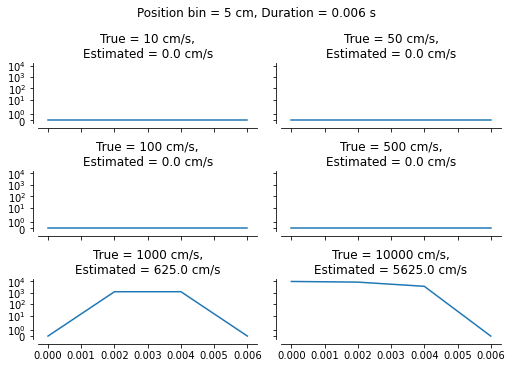

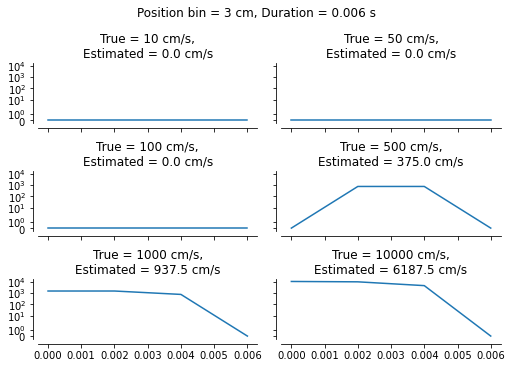

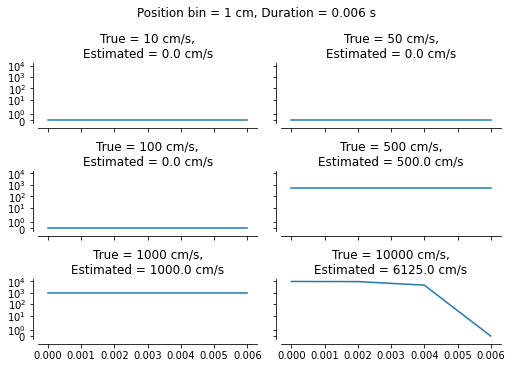

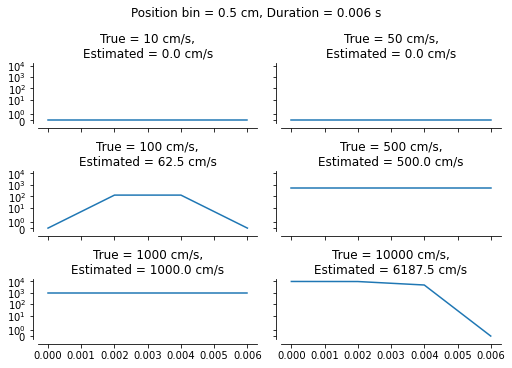

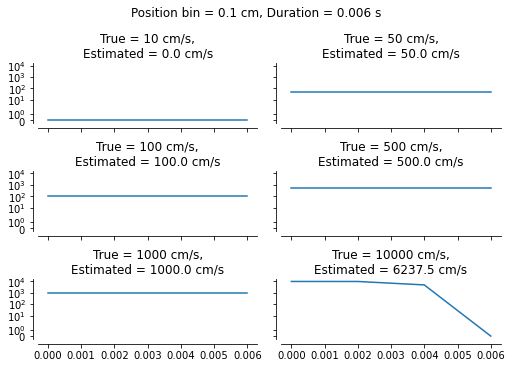

In [756]:
bin_size = [5, 3, 1, 0.5, 0.1]

for bs in bin_size:
    plot_estimated_speed(time_bin=0.002, position_bin=bs, duration=0.006)

In [761]:
replay_info.columns.tolist()

['Continuous',
 'Continuous_Cont_avg_prob',
 'Continuous_Frag_avg_prob',
 'Continuous_Hov_avg_prob',
 'Continuous_duration',
 'Continuous_max_probability',
 'Continuous_max_time',
 'Continuous_min_time',
 'Continuous_n_total_spikes',
 'Continuous_n_unique_spiking',
 'Continuous_population_rate',
 'Continuous_replay_distance_from_actual_position',
 'Continuous_replay_distance_from_center_well',
 'Continuous_replay_linear_position',
 'Continuous_replay_speed',
 'Continuous_replay_total_distance',
 'Continuous_replay_velocity_actual_position',
 'Continuous_replay_velocity_center_well',
 'Continuous_spatial_coverage',
 'Continuous_spatial_coverage_percentage',
 'Fragmented',
 'Fragmented-Continuous-Mix',
 'Fragmented-Continuous-Mix_Cont_avg_prob',
 'Fragmented-Continuous-Mix_Frag_avg_prob',
 'Fragmented-Continuous-Mix_Hov_avg_prob',
 'Fragmented-Continuous-Mix_duration',
 'Fragmented-Continuous-Mix_max_probability',
 'Fragmented-Continuous-Mix_max_time',
 'Fragmented-Continuous-Mix_min_tim